In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [3]:
df=pd.read_csv('kaggle_survey_2021_responses.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24208\215175980.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('kaggle_survey_2021_responses.csv')


In [4]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# To print information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [6]:
# To return the memory usage of each column in bytes
df.memory_usage()

Index                                     132
Time from Start to Finish (seconds)    207792
Q1                                     207792
Q2                                     207792
Q3                                     207792
                                        ...  
Q38_B_Part_8                           207792
Q38_B_Part_9                           207792
Q38_B_Part_10                          207792
Q38_B_Part_11                          207792
Q38_B_OTHER                            207792
Length: 370, dtype: int64

In [7]:
# statistical summary 
df.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25974,25974,25974,25974,25974,25974,25974,21861,5335,10757,...,634,592,4240,730,738,1021,667,2748,1,378
unique,5410,12,6,67,8,16,8,2,2,2,...,2,2,2,2,2,2,2,2,1,2
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,"In the next 2 years, do you hope to become mor...",Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,1,377


In [8]:
# To print index (row labels) 
df.index

RangeIndex(start=0, stop=25974, step=1)

In [9]:
# To list the columns of the data
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [10]:
# To return a list of the axes of the dataframe
df.axes

[RangeIndex(start=0, stop=25974, step=1),
 Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
        'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
        ...
        'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
        'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
        'Q38_B_Part_11', 'Q38_B_OTHER'],
       dtype='object', length=369)]

In [11]:
# Return the dtypes in the DataFrame.
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object

In [12]:
# Return no of rows and columns 
df.shape

(25974, 369)

In [13]:
# Return no of dimensions
df.ndim

2

In [14]:
# Return number of elements 
df.size

9584406

In [15]:
# Get the counts of unique values in Q1
df['Q1']. value_counts().head()

Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
Name: count, dtype: int64

In [16]:
# Get the total no of null values in each column
df.isna().sum(axis=0)

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_8                           24953
Q38_B_Part_9                           25307
Q38_B_Part_10                          23226
Q38_B_Part_11                          25973
Q38_B_OTHER                            25596
Length: 369, dtype: int64

In [17]:
#Get the unique values of particular column
df['Q7_Part_1'].unique()

array(['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
       'Python', nan], dtype=object)

In [18]:
# Get the unique values of particular column
df['Q1'].unique()

array(['What is your age (# years)?', '50-54', '22-24', '45-49', '25-29',
       '18-21', '30-34', '40-44', '35-39', '70+', '55-59', '60-69'],
      dtype=object)

In [19]:
# Get the count
df['Q5'].count()

25974

In [20]:
# Get the count of null values in a particular column
df['Q1'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
25969    False
25970    False
25971    False
25972    False
25973    False
Name: Q1, Length: 25974, dtype: bool

In [21]:
# Clean your data columns titles
df.columns = df.iloc[0]
df = df[1:]
df.columns= [c.replace(' ','_') for c in df.columns]
df.columns = df.columns.str.rstrip()
df

,Duration_(in_seconds),What_is_your_age_(#_years)?,What_is_your_gender?_-_Selected_Choice,In_which_country_do_you_currently_reside?,What_is_the_highest_level_of_formal_education_that_you_have_attained_or_plan_to_attain_within_the_next_2_years?,Select_the_title_most_similar_to_your_current_role_(or_most_recent_title_if_retired):_-_Selected_Choice,For_how_many_years_have_you_been_writing_code_and/or_programming?,What_programming_languages_do_you_use_on_a_regular_basis?_(Select_all_that_apply)_-_Selected_Choice_-_Python,What_programming_languages_do_you_use_on_a_regular_basis?_(Select_all_that_apply)_-_Selected_Choice_-_R,What_programming_languages_do_you_use_on_a_regular_basis?_(Select_all_that_apply)_-_Selected_Choice_-_SQL,...,"In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__Comet.ml_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__Sacred_+_Omniboard_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__TensorBoard_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__Guild.ai_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__Polyaxon_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__ClearML_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__Domino_Model_Monitor_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-__MLflow_","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-_None","In_the_next_2_years,_do_you_hope_to_become_more_familiar_with_any_of_these_tools_for_managing_ML_experiments?_(Select_all_that_apply)_-_Selected_Choice_-_Other"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Get the max survey time ( in seconds and minutes)
df['Duration_(in_seconds)'] = df['Duration_(in_seconds)'].astype(int)
max_time = df['Duration_(in_seconds)'].max()
min_time = df['Duration_(in_seconds)'].min()
mean_time = df['Duration_(in_seconds)'].mean()
print('Max time taken( in seconds):', max_time,'seconds')
print('Min time taken( in seconds):', min_time,'seconds')
print('Mean time taken( in seconds):', mean_time,'seconds')
print('Max time taken( in min):', max_time/60,'min')
print('Min time taken( in min):', min_time/60,'min')
print('Mean time taken( in min):', mean_time,'min')

Max time taken( in seconds): 2488653 seconds
Min time taken( in seconds): 120 seconds
Mean time taken( in seconds): 11054.66492126439 seconds
Max time taken( in min): 41477.55 min
Min time taken( in min): 2.0 min
Mean time taken( in min): 11054.66492126439 min


So we have outliers in the duration of survey completion as you can see that a data point indicates max time taken to complete the survey as 41477.55 min.

<Figure size 1000x800 with 0 Axes>

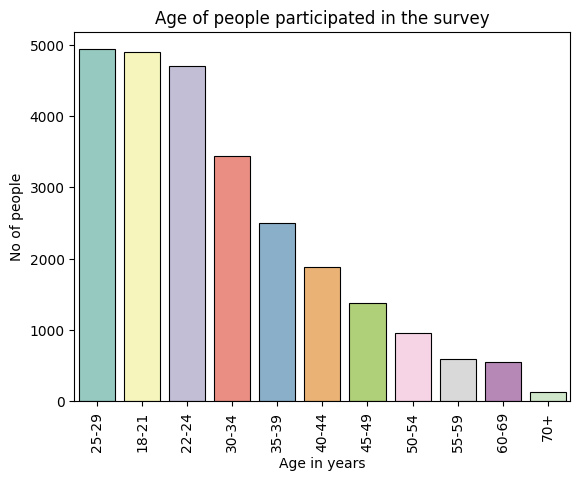

In [23]:
# Age of survey participants
import seaborn as sns
from matplotlib import pyplot as plt
# Set the figure size to 10x8 inches
plt.figure(figsize=(10, 8))

# Set the dpi to 100
plt.figure(dpi=100)
age_index=df['What_is_your_age_(#_years)?'].value_counts().index
age_values = df['What_is_your_age_(#_years)?'].value_counts().values
sns.barplot(x=age_index,y=age_values,palette ='Set3',edgecolor='black',linewidth=0.8)
plt.xlabel('Age in years')
plt.ylabel('No of people')
plt.title('Age of people participated in the survey')
plt.xticks(rotation =90)
plt.show()

<Figure size 1000x800 with 0 Axes>

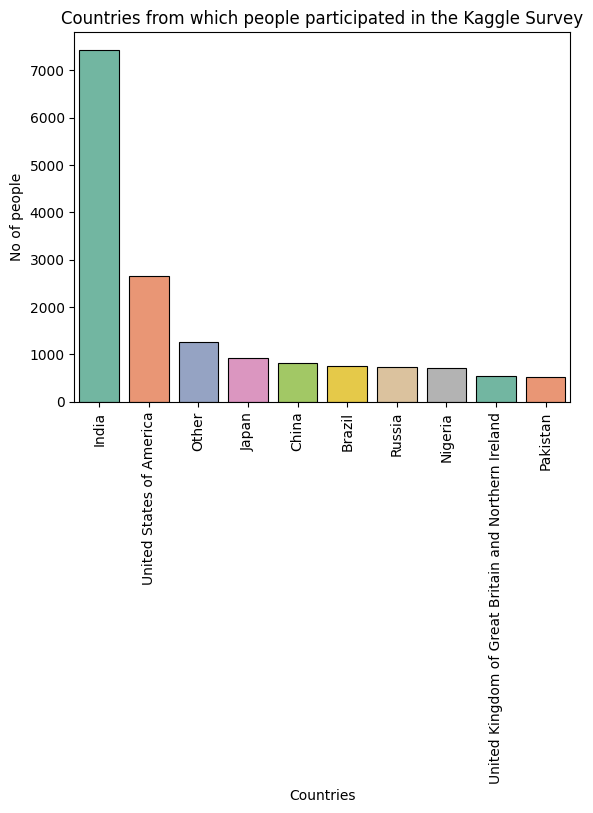

In [24]:
# From which countries people participated
df1= df['In_which_country_do_you_currently_reside?'].value_counts().head(10)
df1
plt.figure(figsize=(10, 8))

# Set the dpi to 100
plt.figure(dpi=100)
# plot 
sns.barplot(x=df1.index,y=df1.values,palette='Set2',linewidth=0.8,edgecolor='black')
plt.xlabel('Countries')
plt.ylabel('No of people')
plt.title('Countries from which people participated in the Kaggle Survey')
plt.xticks(rotation=90)
plt.show()

In [25]:
# What is the highest qualification of people who participated in the Kaggle Survey
df2 = df['What_is_the_highest_level_of_formal_education_that_you_have_attained_or_plan_to_attain_within_the_next_2_years?'].value_counts().head()
df2

What_is_the_highest_level_of_formal_education_that_you_have_attained_or_plan_to_attain_within_the_next_2_years?
Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
Name: count, dtype: int64

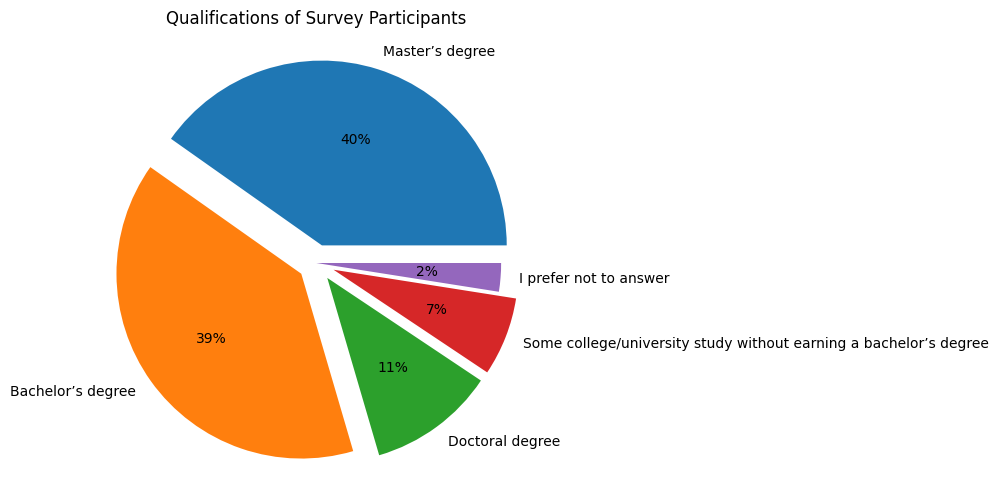

In [26]:
# plot the Qualifications of the survey participants
from matplotlib.pyplot import figure
figure(figsize=(8,6),dpi=100)
plt.pie(x=df2,labels=df2.index,autopct='%.0f%%',explode=[0.1,0.1,0.1,0.1,0])
plt.title('Qualifications of Survey Participants')
plt.show()

In [27]:
# Years of Programming Experience
df3=df['For_how_many_years_have_you_been_writing_code_and/or_programming?'].value_counts().head(10)
df3


For_how_many_years_have_you_been_writing_code_and/or_programming?
1-3 years                    7874
< 1 years                    5881
3-5 years                    4061
5-10 years                   3099
10-20 years                  2166
20+ years                    1860
I have never written code    1032
Name: count, dtype: int64

In [28]:
# Gender wise survey participants
df['genderwise_participants'] = df['What_is_your_gender?_-_Selected_Choice'].str.replace('_-_Selected_Choice','')
g_participants = df['genderwise_participants'].value_counts().head(3)
g_participants

genderwise_participants
Man                  20598
Woman                 4890
Prefer not to say      355
Name: count, dtype: int64

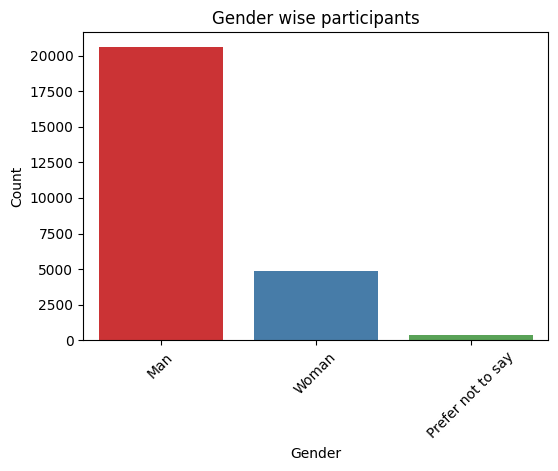

In [29]:
# Plot gender wise survey participants
figure(figsize=(6,4),dpi=100)
sns.barplot(x=g_participants.index,y=g_participants.values,palette='Set1',hue_order=g_participants.index)
plt.title('Gender wise participants')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

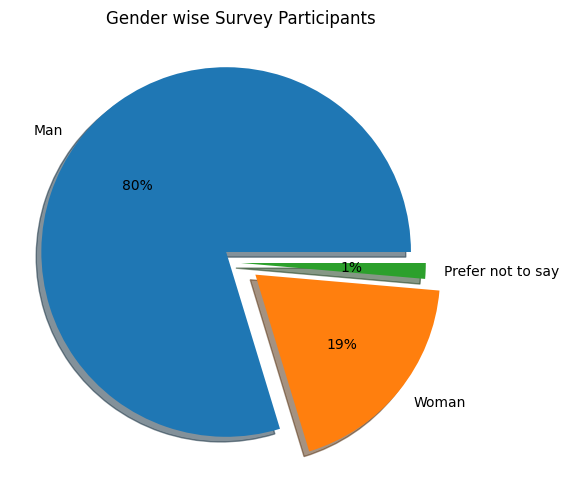

In [30]:
# Percentage or Proportion of Women participants
figure(figsize=(8,6),dpi=100)
plt.pie(x=g_participants.values,labels=g_participants.index,autopct='%.0f%%',shadow=True,explode=[0.1,0.1,0])
plt.title('Gender wise Survey Participants')
plt.show()

In [31]:
# Average Time taken by Participants Age
avg_time_age = df[df['Duration_(in_seconds)']<9000].groupby('What_is_your_age_(#_years)?')['Duration_(in_seconds)'].mean().sort_values(ascending=False)
avg_time_age

What_is_your_age_(#_years)?
70+      1114.443548
55-59    1108.299296
45-49    1077.638564
50-54    1061.928261
40-44    1055.300501
35-39    1053.026437
60-69    1015.445896
30-34     984.356511
25-29     930.011690
22-24     832.497453
18-21     715.282475
Name: Duration_(in_seconds), dtype: float64

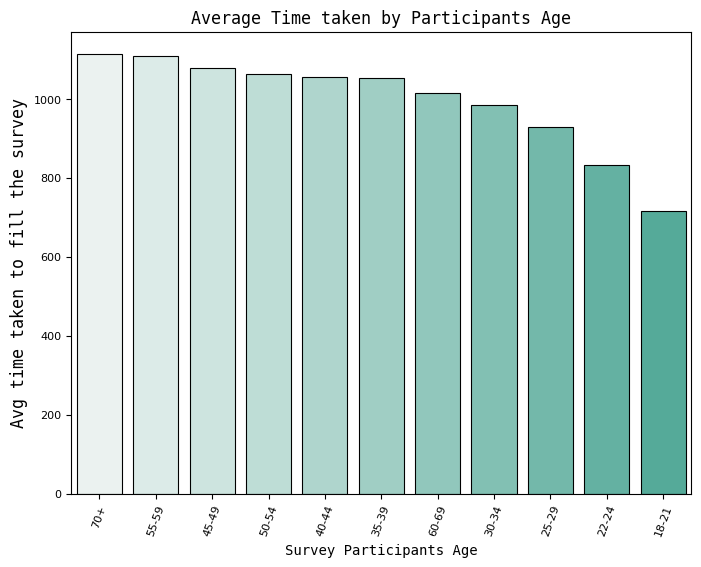

In [32]:
# plot Average Time taken by Participants Age
figure(figsize=(8,6),dpi=100)
sns.barplot(x=avg_time_age.index,y=avg_time_age.values,palette='light:#5A9',linewidth=0.8,edgecolor='black',saturation = 1.2)
plt.xlabel('Survey Participants Age',fontname='monospace')
plt.ylabel('Avg time taken to fill the survey',fontsize=12,fontname='monospace')
plt.title('Average Time taken by Participants Age',fontsize=12,fontname='monospace')
plt.xticks(rotation=70,fontsize=8)
plt.yticks(fontsize=8)
plt.show()

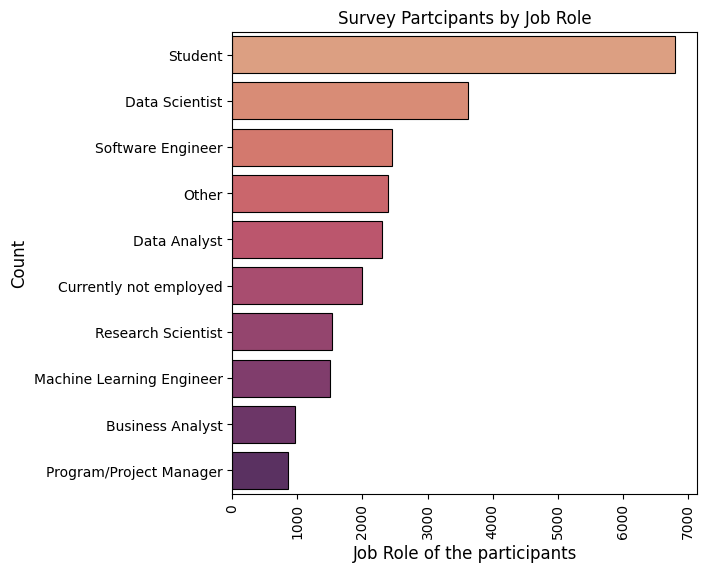

In [33]:
# Survey Partcipants by Job Role
job_role = df['Select_the_title_most_similar_to_your_current_role_(or_most_recent_title_if_retired):_-_Selected_Choice'].value_counts().head(10)
job_role
#plot
figure(figsize=(6,6),dpi=100)
sns.barplot(y=job_role.index,x=job_role.values,palette='flare',linewidth=0.8,edgecolor='black',orient='h')
plt.title('Survey Partcipants by Job Role',fontsize=12)
plt.xlabel('Job Role of the participants',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [34]:
# Age wise participants Gender
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
f = px.sunburst(df, path = ['What_is_your_gender?_-_Selected_Choice','What_is_your_age_(#_years)?'],color='What_is_your_gender?_-_Selected_Choice',title = 'Age wise participants Gender')
f.update_traces(textinfo = 'percent parent+label')
f.update_layout(margin=dict(t=20,l=0,r=0,b=0))
f.show()

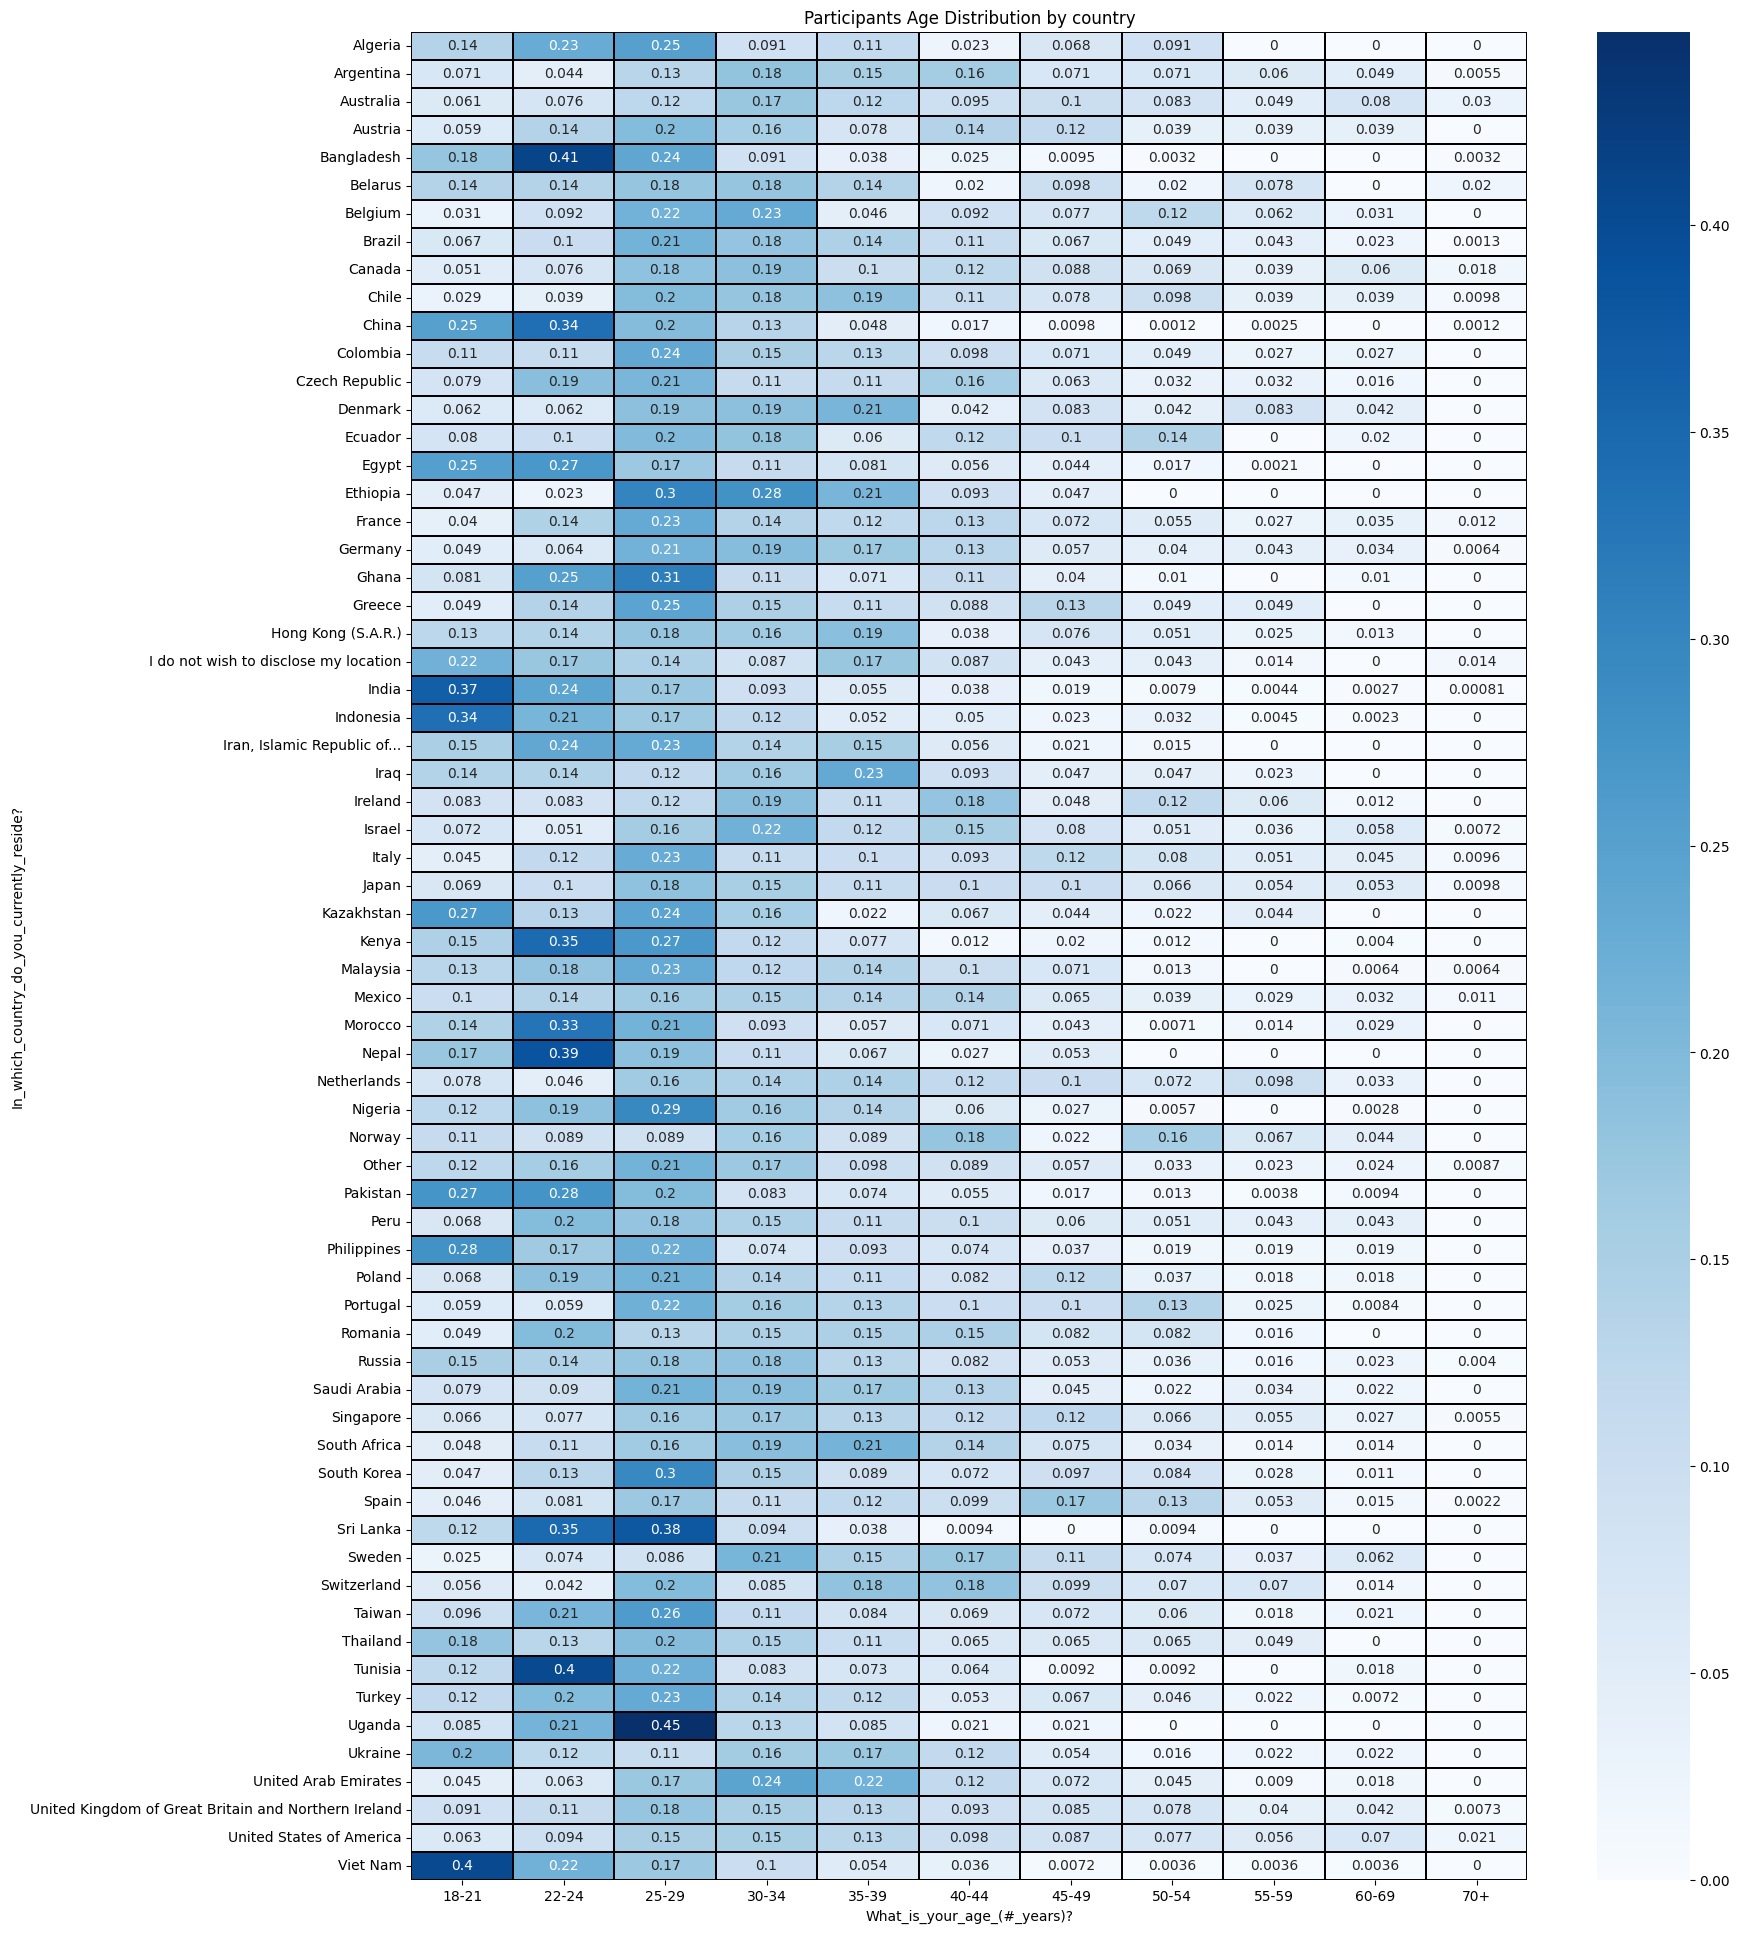

In [35]:
# Participants Age by Country
figure(figsize=(18,24),dpi=100)
age_country = df.groupby(['In_which_country_do_you_currently_reside?','What_is_your_age_(#_years)?']).size().unstack().fillna(0).astype('int64')
sns.heatmap(age_country.apply(lambda x:x/x.sum(),axis=1),cmap='Blues',annot=True,xticklabels=True,yticklabels=True,cbar=True,linecolor='black',linewidth=0.008)
#sns.heatmap(age_country,cmap='Blues',annot=True,xticklabels=True,yticklabels=True,cbar=True,linecolor='black',linewidth=0.008)
plt.title('Participants Age Distribution by country')
plt.show()

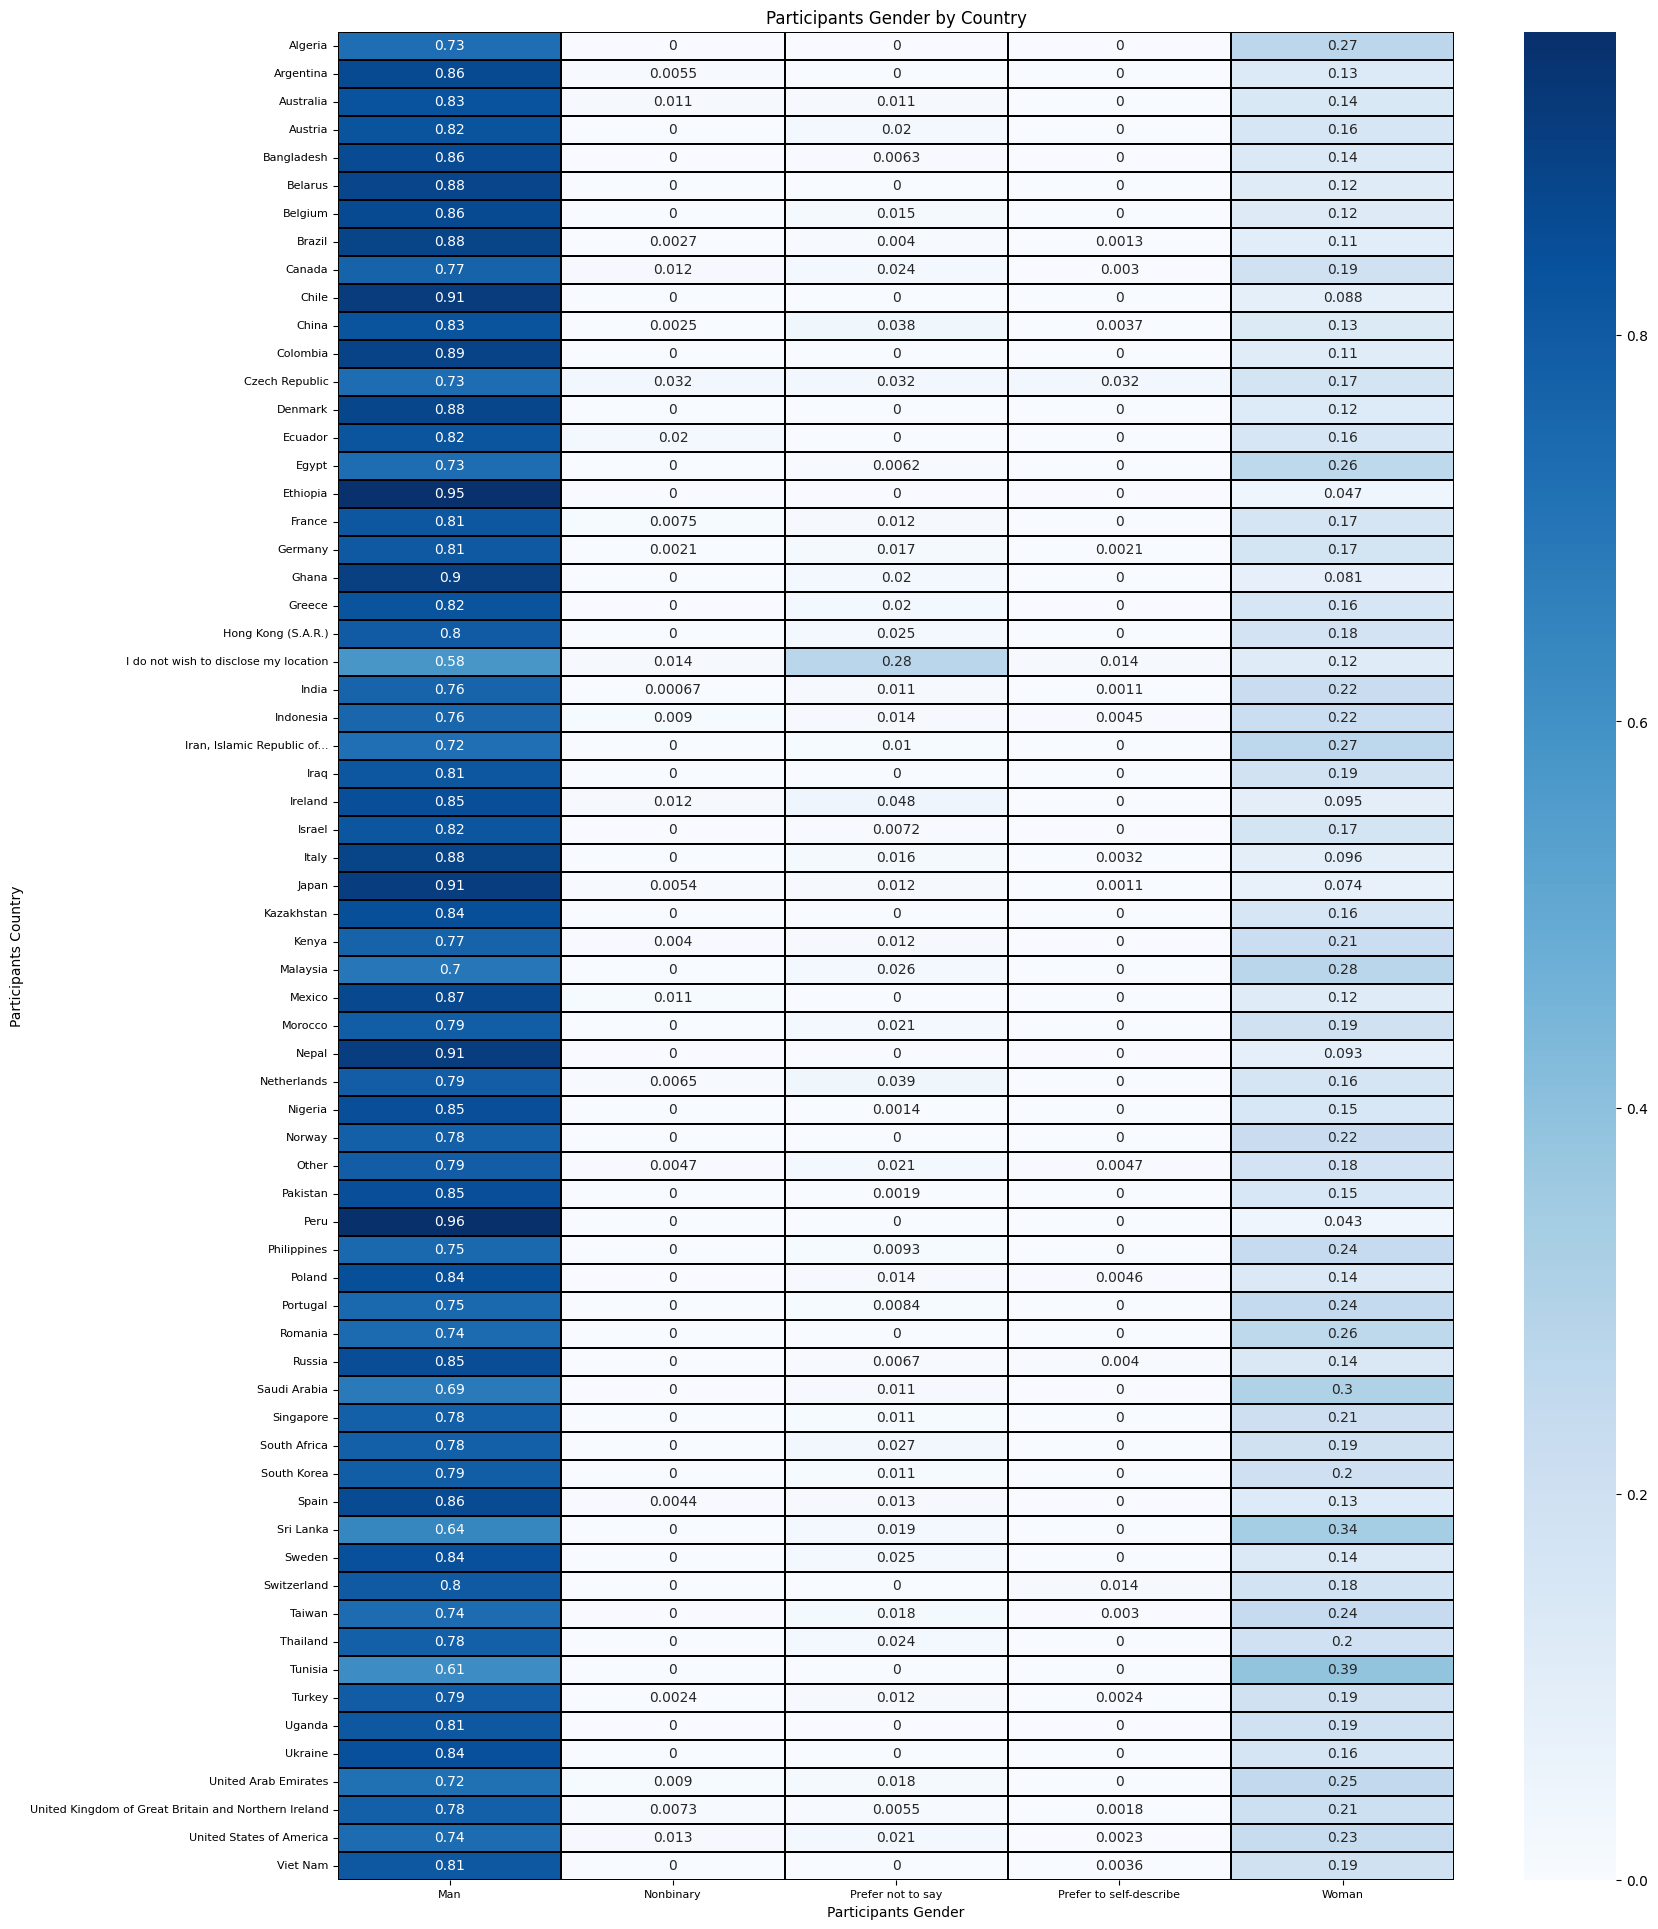

In [36]:
# Paticipants Gender by Country
gender_country = df.groupby(['In_which_country_do_you_currently_reside?','What_is_your_gender?_-_Selected_Choice']).size().unstack().fillna(0).astype('int64')
#plot 
figure(figsize=(18,24),dpi=100)
sns.heatmap(gender_country.apply(lambda x:x/x.sum(),axis=1),cmap='Blues',annot=True,xticklabels=True,yticklabels=True,linewidth=0.008,linecolor='black',cbar=True)
plt.title("Participants Gender by Country")
plt.xlabel('Participants Gender')
plt.ylabel('Participants Country')
plt.xticks(fontsize=8)
plt.yticks( fontsize=8)

plt.show()